In [1]:
import numpy
import sys
import numpy as np
import tensorflow as tf
import pickle
from tqdm import tqdm_notebook as tqm
from time import time
import math

import matplotlib.pyplot as plt

sys.path.append('..')

from linknet import LinkNetBatch
from dataset import Dataset, DatasetIndex
from plot_functions import plot_example_interactive, plot_examples

%matplotlib inline

[]


In [2]:
! nvidia-smi

"nvidia-smi" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
IMAGE_SIZE = 64
MNIST_SIZE = 65000
BATCH_SIZE = 500
N_EPOCHS = 10
MAX_ITER = 100

In [4]:
ind = DatasetIndex(np.arange(MNIST_SIZE))
mnistset = Dataset(ind, batch_class=LinkNetBatch)
mnistset.cv_split([0.9, 0.1])

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [6]:
prediction = []
test_log = []
train_log = []

In [7]:
ppl = mnistset.train.pipeline()\
        .load()\
        .noise_and_mask()\
        .train(sess)\
        .get_stat(sess, train_log, True)
        
ppl_test = mnistset.test.pipeline()\
            .load()\
            .noise_and_mask()\

In [ ]:
start = time()
for i in range(MAX_ITER):
    ppl.next_batch(BATCH_SIZE, n_epochs=None)
    ppl_test.get_stat(sess, test_log, False).next_batch(100, n_epochs=None)
    if (i+1) % 10 == 0:
        print("Iter {}: Train loss: {}, test loss: {}".format(i+1, train_log[-1][0], test_log[-1][0]))
stop = time()
print("Train time: {} min".format((stop-start)/60))

In [15]:
test_loss, test_iou = list(zip(*test_log))
train_loss, train_iou = list(zip(*train_log))
test_iou = list(zip(*test_iou))[0]
train_iou = list(zip(*train_iou))[0]

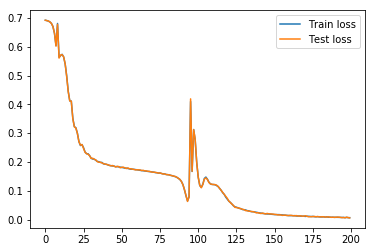

In [16]:
plt1, = plt.plot(train_loss,  label='Train loss')
plt2, = plt.plot(test_loss, label='Test loss')
plt.legend(handles=[plt1, plt2])
plt.show()

In [17]:
prediction = []
ppl_test.predict_proba(sess, prediction).next_batch(10, n_epochs=None)

In [18]:
with open('predictions.pkl', 'wb') as output:
    pickle.dump(prediction, output, pickle.HIGHEST_PROTOCOL)

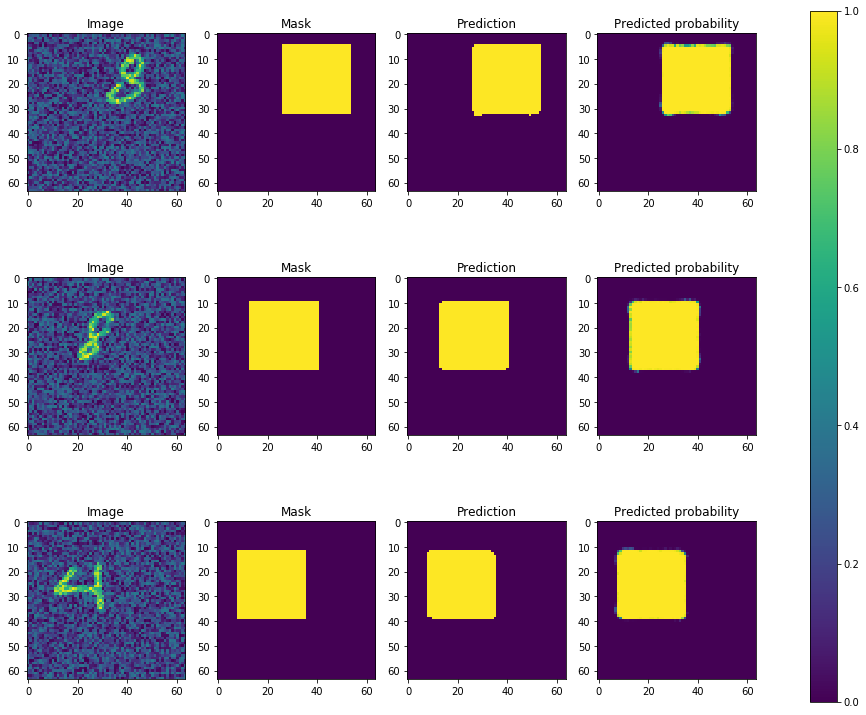

In [19]:
plot_examples(prediction)